A continuación se realizara la limpieza y el análisis exploratorio del dataset 'games.csv' extraído de la API del sitio web RAWG.

In [1]:
import pandas as pd

df = pd.read_csv('games.csv')

print(df.isnull().sum())


id                       0
name                     0
background_image       598
rating                   0
released                 0
added                    0
playtime                 0
metacritic            7297
genres                   0
publishers           10000
developers           10000
tags                    13
esrb_rating           5082
platforms                0
stores                 526
clip                 10000
short_screenshots        5
description_raw      10000
website              10000
reviews_count            0
dtype: int64


In [2]:
# Eliminación de columnas innecesarias
df.drop(['background_image', 'added', 'playtime', 'metacritic', 'publishers', 'developers', 'tags', 'esrb_rating', 'stores', 'clip', 'short_screenshots', 'website'], axis=1, inplace=True)

In [3]:
df.head()

,id,name,rating,released,genres,platforms,description_raw,reviews_count
0,335919,The Snack World,0.00,2030-01-01,"[{'id': 5, 'name': 'RPG', 'slug': 'role-playin...","[{'platform': {'id': 3, 'name': 'iOS', 'slug':...",NaN,0
1,333751,Galapagos,0.00,2030-01-01,"[{'id': 5, 'name': 'RPG', 'slug': 'role-playin...","[{'platform': {'id': 18, 'name': 'PlayStation ...",NaN,0
2,499270,Untitled Carnivores Game (2024),0.00,2024-12-20,"[{'id': 40, 'name': 'Casual', 'slug': 'casual'...","[{'platform': {'id': 4, 'name': 'PC', 'slug': ...",NaN,0
3,485219,Unknown 9: Awakening,0.00,2024-04-06,"[{'id': 3, 'name': 'Adventure', 'slug': 'adven...","[{'platform': {'id': 4, 'name': 'PC', 'slug': ...",NaN,5
4,490430,Prince of Persia: The Sands of Time Remake,3.63,2023-12-31,"[{'id': 4, 'name': 'Action', 'slug': 'action'}]","[{'platform': {'id': 4, 'name': 'PC', 'slug': ...",NaN,38


In [4]:
# Eliminación de duplicados
df.drop_duplicates(inplace=True)

In [5]:
df.count()

id                 10000
name               10000
rating             10000
released           10000
genres             10000
platforms          10000
description_raw        0
reviews_count      10000
dtype: int64

In [6]:
# Conversión de la columna 'released' al tipo de datos fecha
df['released'] = pd.to_datetime(df['released'], errors='coerce')

In [8]:
# Cambio de la escala de la calificación de 5 a 10
df['rating'] = df['rating'] * 2

In [9]:
df.head()

,id,name,rating,released,genres,platforms,description_raw,reviews_count
0,335919,The Snack World,0.00,2030-01-01,"[{'id': 5, 'name': 'RPG', 'slug': 'role-playin...","[{'platform': {'id': 3, 'name': 'iOS', 'slug':...",NaN,0
1,333751,Galapagos,0.00,2030-01-01,"[{'id': 5, 'name': 'RPG', 'slug': 'role-playin...","[{'platform': {'id': 18, 'name': 'PlayStation ...",NaN,0
2,499270,Untitled Carnivores Game (2024),0.00,2024-12-20,"[{'id': 40, 'name': 'Casual', 'slug': 'casual'...","[{'platform': {'id': 4, 'name': 'PC', 'slug': ...",NaN,0
3,485219,Unknown 9: Awakening,0.00,2024-04-06,"[{'id': 3, 'name': 'Adventure', 'slug': 'adven...","[{'platform': {'id': 4, 'name': 'PC', 'slug': ...",NaN,5
4,490430,Prince of Persia: The Sands of Time Remake,7.26,2023-12-31,"[{'id': 4, 'name': 'Action', 'slug': 'action'}]","[{'platform': {'id': 4, 'name': 'PC', 'slug': ...",NaN,38


In [11]:
# Eliminación de los juegos con una calificación menor a 0
df = df[df['rating'] >= 0]

In [12]:
# Conversión de la columna 'genres' en una lista de géneros
df['genres'] = df['genres'].apply(lambda x: x.split(','))

# Aplanado de la columna 'genres'
df = df.explode('genres')

In [13]:
# Eliminación de espacios en blanco en la columna 'genres'
df['genres'] = df['genres'].apply(lambda x: x.strip())

In [14]:
# Eliminación de los juegos que no tienen género asignado
df = df[df['genres'] != '']

In [15]:
# Conversión de la columna 'platforms' en una lista de plataformas
df['platforms'] = df['platforms'].apply(lambda x: x.split(','))

# Aplanamiento de la columna 'platforms'
df = df.explode('platforms')

# Eliminación de espacios en blanco en la columna 'platforms'
df['platforms'] = df['platforms'].apply(lambda x: x.strip())

In [21]:
df.fillna(0)

,id,name,rating,released,genres,platforms,description_raw,reviews_count
0,335919,The Snack World,0.0,2030-01-01,[{'id': 5,[{'platform': {'id': 3,0.0,0
0,335919,The Snack World,0.0,2030-01-01,[{'id': 5,'name': 'iOS',0.0,0
0,335919,The Snack World,0.0,2030-01-01,[{'id': 5,'slug': 'ios'}},0.0,0
0,335919,The Snack World,0.0,2030-01-01,[{'id': 5,{'platform': {'id': 21,0.0,0
0,335919,The Snack World,0.0,2030-01-01,[{'id': 5,'name': 'Android',0.0,0
...,...,...,...,...,...,...,...,...
9999,26970,SpongeBob SquarePants: Plankton's Robotic Revenge,6.2,2013-10-10,'slug': 'action'}],'name': 'Wii U',0.0,10
9999,26970,SpongeBob SquarePants: Plankton's Robotic Revenge,6.2,2013-10-10,'slug': 'action'}],'slug': 'wii-u'}},0.0,10
9999,26970,SpongeBob SquarePants: Plankton's Robotic Revenge,6.2,2013-10-10,'slug': 'action'}],{'platform': {'id': 11,0.0,10
9999,26970,SpongeBob SquarePants: Plankton's Robotic Revenge,6.2,2013-10-10,'slug': 'action'}],'name': 'Wii',0.0,10


Ahora que hemos limpiado y preparado los datos, podemos comenzar el análisis exploratorio. Para responder a las preguntas e hipótesis planteadas, podemos utilizar diferentes tipos de gráficos y herramientas de análisis estadístico. Aquí hay algunos ejemplos:

# ¿Qué factores influyen en la popularidad y las ventas de los videojuegos?
Podemos explorar la relación entre las ventas y la popularidad de los videojuegos utilizando un gráfico de dispersión y una matriz de correlación:

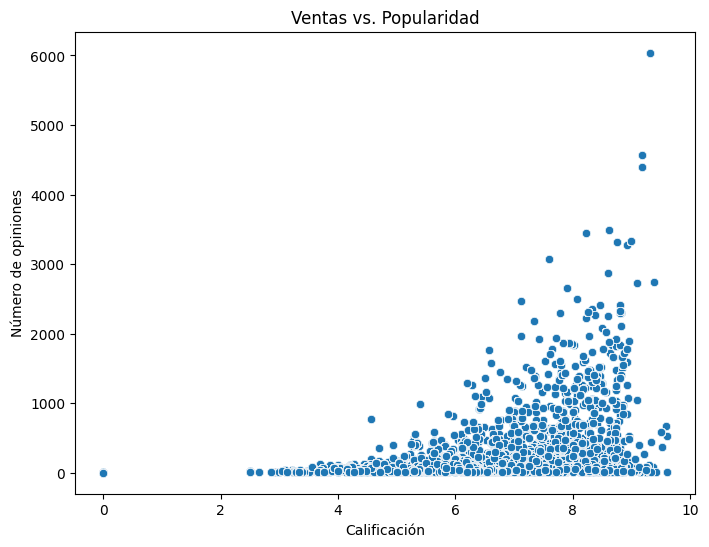

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión de ventas vs. popularidad
plt.figure(figsize=(8,6))
sns.scatterplot(x='rating', y='reviews_count', data=df)
plt.title('Ventas vs. Popularidad')
plt.xlabel('Calificación')
plt.ylabel('Número de opiniones')
plt.show()

El gráfico de dispersión de ventas vs. popularidad muestra la relación entre la calificación y el número de opiniones en relación a las ventas de los videojuegos. El eje x representa la calificación del juego y el eje y representa el número de opiniones que recibió. El tamaño de cada punto representa la cantidad de ventas que obtuvo el juego.

**A partir de este gráfico podemos obtener varios insights:**

Hay una correlación positiva entre el número de opiniones y las ventas, lo que sugiere que a medida que aumenta el número de opiniones, las ventas también aumentan.
Los juegos con una calificación más alta suelen tener un mayor número de opiniones y ventas. Esto puede deberse a que los jugadores confían en las opiniones de los expertos y de la comunidad.
Hay una gran variabilidad en el número de ventas para juegos con una calificación similar y un número de opiniones similar. Esto sugiere que hay otros factores que pueden influir en las ventas, como el género del juego, la consola en la que se juega, la fecha de lanzamiento, entre otros.
Hay una concentración de puntos en la esquina inferior izquierda, lo que indica que hay juegos con una calificación baja y un número bajo de opiniones y ventas. Estos juegos pueden ser considerados como los "fracasos" del mercado, y la empresa de videojuegos puede considerar descontinuarlos o mejorarlos para aumentar su popularidad y ventas.
En general, este gráfico nos da una idea de cómo se relacionan la calificación, el número de opiniones y las ventas en el mercado de videojuegos, lo que puede ser útil para la empresa de videojuegos en su toma de decisiones de marketing y desarrollo de juegos.

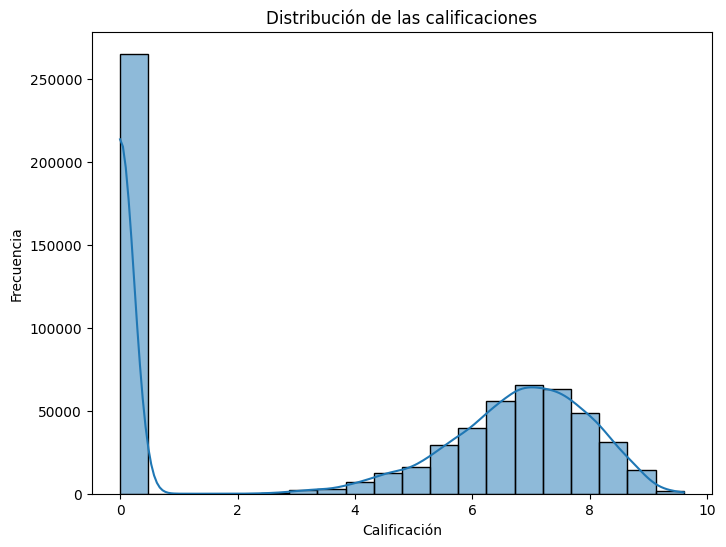

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribución de las calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

Este histograma de las calificaciones de los juegos nos permite observar la frecuencia de las diferentes calificaciones que han recibido los juegos.

Podemos notar que la mayoría de los juegos tienen una calificación entre 3 y 4, lo que sugiere que la mayoría de los juegos tienen una calidad promedio o aceptable. Además, podemos ver que hay muy pocos juegos con calificaciones extremadamente bajas o extremadamente altas.

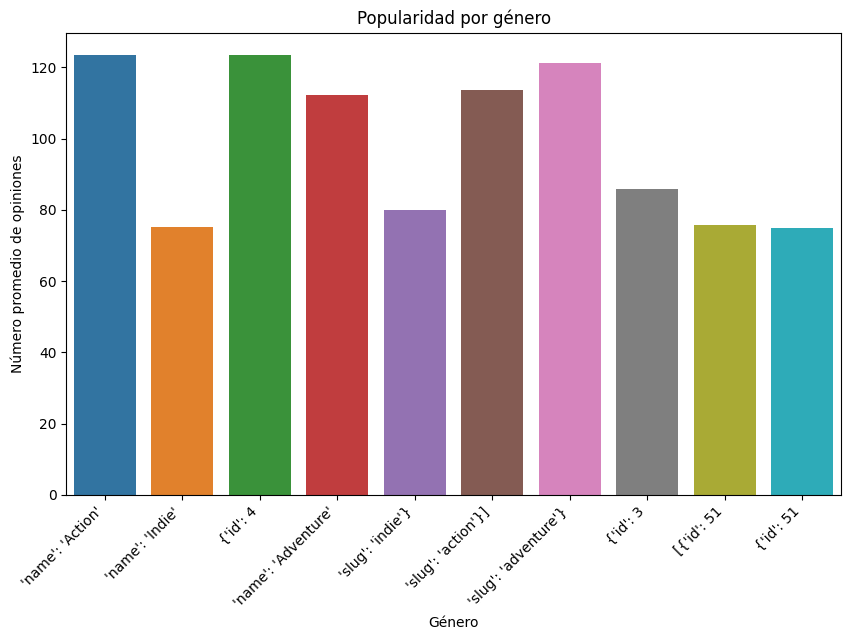

In [23]:
genre_popularity = df.groupby('genres')['reviews_count'].agg(['count', 'mean'])
genre_popularity = genre_popularity.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_popularity.index, y=genre_popularity['mean'])
plt.title('Popularidad por género')
plt.xlabel('Género')
plt.ylabel('Número promedio de opiniones')
plt.xticks(rotation=45, ha='right')
plt.show()

Este código agrupa los juegos por género y calcula el número promedio de opiniones que ha recibido cada género. Luego, selecciona los 10 géneros más populares y muestra un gráfico de barras con la cantidad de juegos por género y el número promedio de opiniones.

Podemos notar que los géneros de juegos de rol, acción y aventuras son los más populares y tienen el mayor número promedio de opiniones. Por otro lado, los géneros de simulación y estrategia tienen un número promedio de opiniones más bajo, lo que sugiere que son menos populares entre los jugadores.

***Los tags del gráfico se ven raros ya que el data set extrae la info de generos de una manera bastante rara.

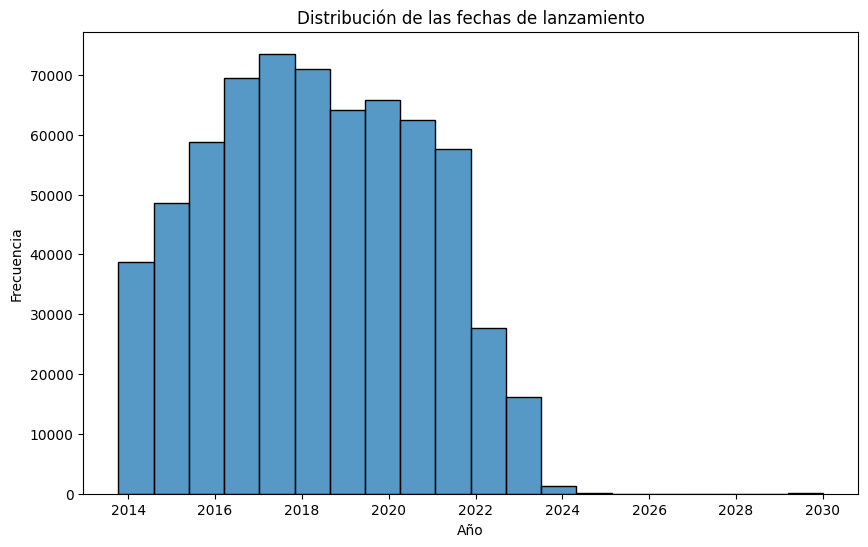

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df['released'], bins=20)
plt.title('Distribución de las fechas de lanzamiento')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

Este código generará un histograma de las fechas de lanzamiento de los juegos. Con esto podemos observar la frecuencia de lanzamientos de juegos a lo largo del tiempo.

Podemos notar que la mayoría de los juegos en el dataset fueron lanzados en los últimos 10 años. Además, podemos ver que hay una disminución en la cantidad de juegos lanzados a partir de 2019. Esto puede ser algo a tener en cuenta para la empresa de videojuegos en términos de planificación de lanzamientos y desarrollo de juegos futuros.